# UFO Sightings Data Analysis Notebook

## Introduction

Welcome to this data analysis notebook dedicated to exploring and understanding UFO sightings. In this analysis, we delve into a dataset containing valuable information about UFO encounters, including details such as date and time, location, UFO shapes, and encounter durations.

### Dataset Overview

The dataset provides a comprehensive record of UFO sightings, offering a unique opportunity to uncover patterns, trends, and insights into these unexplained phenomena. By applying exploratory data analysis (EDA) techniques, we aim to gain a deeper understanding of the temporal, geographical, and categorical aspects of UFO sightings.

### Objectives

In this analysis, we have identified the following objectives:

1. **Temporal Patterns:** Investigate the temporal distribution of sightings to identify trends over the years, months, and hours.
2. **Geographic Insights:** Explore the geographical distribution of sightings to understand where these phenomena are more prevalent.
3. **Seasonal Analysis:** Examine how UFO sightings vary across different seasons.
4. **Country and Region Analysis:** Analyze the distribution of sightings across countries and regions to identify hotspots.
5. **UFO Shapes and Durations:** Investigate the relationship between UFO shapes and encounter durations.

### How to Navigate the Notebook

To help you navigate the notebook, please follow these guidelines:

- Each section of the notebook focuses on a specific aspect of the analysis.
- We have provided code cells along with explanations to guide you through the data exploration process.
- We have presented visualizations, insights, and conclusions to provide a comprehensive overview.

Let's embark on this exploration of UFO sightings data and uncover the mysteries within!

## Dataset Overview

In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

import pandas as pd

In [2]:
data = pd.read_csv("/kaggle/input/ufo-sightings/ufo-sightings-transformed.csv")
data.head()

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80328 entries, 0 to 80327
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   80328 non-null  int64  
 1   Date_time                    80328 non-null  object 
 2   date_documented              80328 non-null  object 
 3   Year                         80328 non-null  int64  
 4   Month                        80328 non-null  int64  
 5   Hour                         80328 non-null  int64  
 6   Season                       80328 non-null  object 
 7   Country_Code                 80069 non-null  object 
 8   Country                      80069 non-null  object 
 9   Region                       79762 non-null  object 
 10  Locale                       79871 non-null  object 
 11  latitude                     80328 non-null  float64
 12  longitude                    80328 non-null  float64
 13  UFO_shape       

In [4]:
data.dropna(inplace=True)

In [5]:
data['Date_time'] = pd.to_datetime(data['Date_time'])
data.drop(columns=["Unnamed: 0"], inplace=True)
data.head(1)

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...


## Exploratory Data Analysis (EDA)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Temporal Analysis
Explore temporal patterns, such as whether there are certain months or hours when sightings are more frequent.

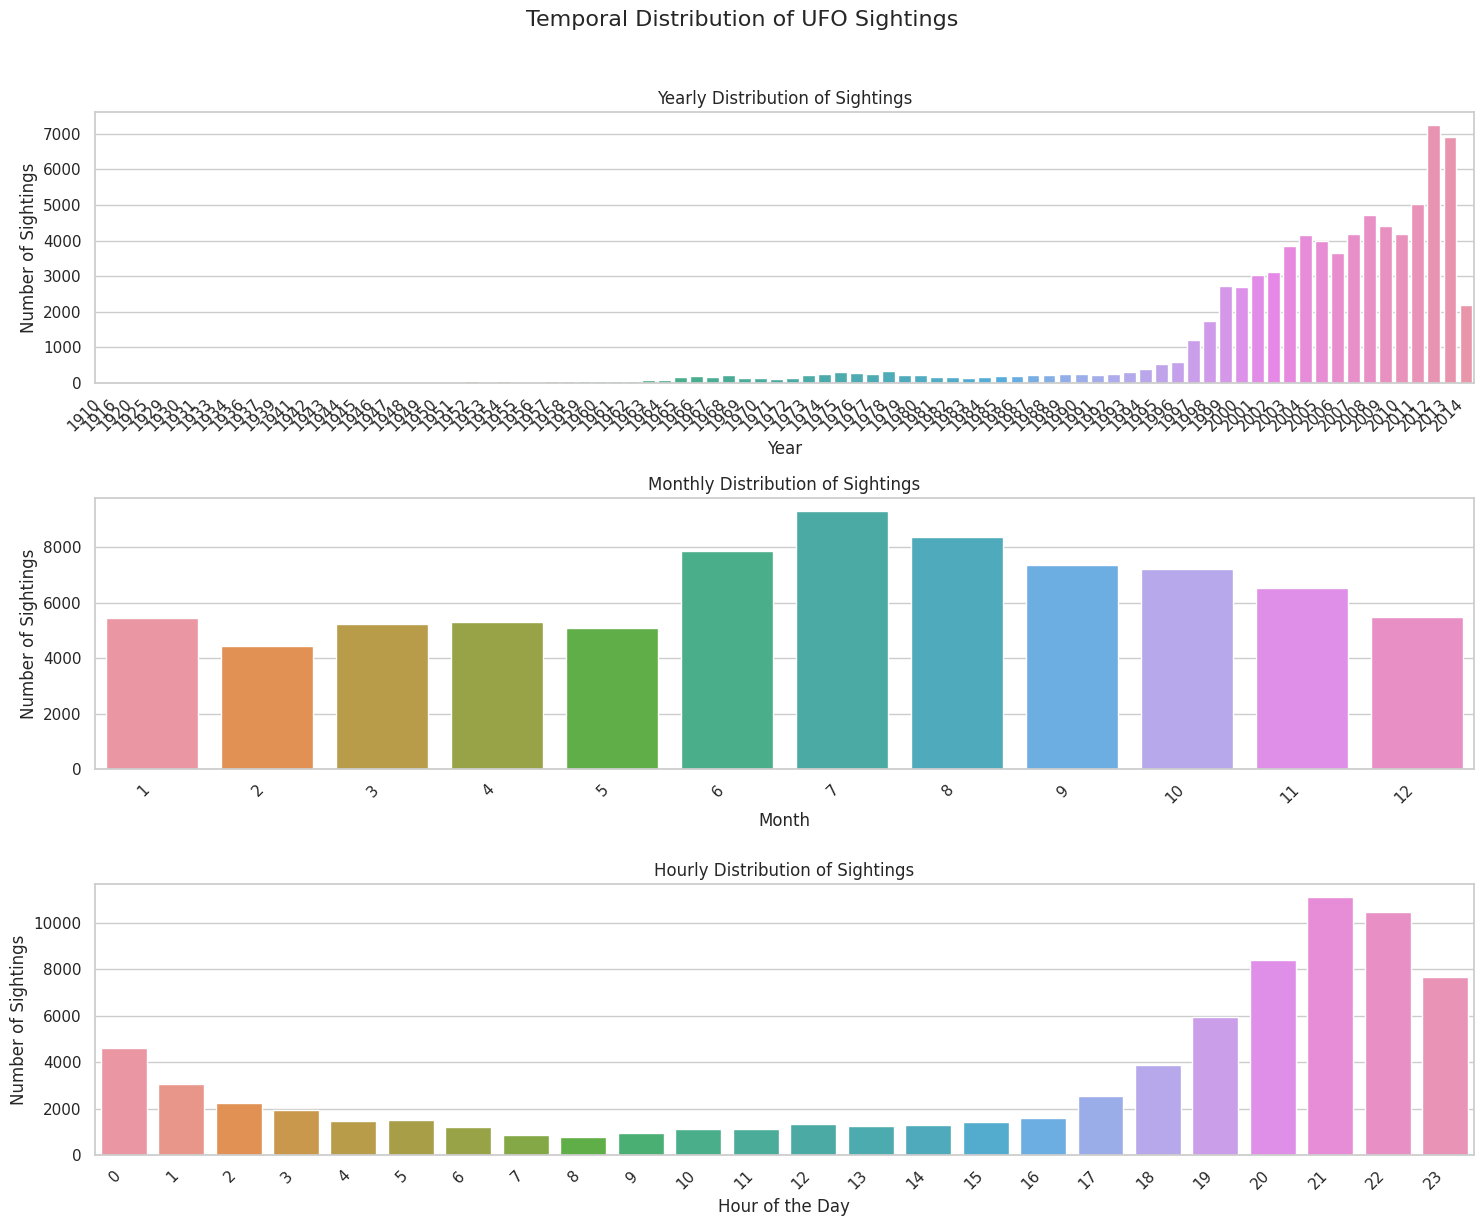

In [7]:
# Set Seaborn style and color palette
sns.set(style="whitegrid", palette="viridis")

# Extract and analyze the distribution of sightings over different years, months, and hours
yearly_counts = data['Year'].value_counts().sort_index()
monthly_counts = data['Month'].value_counts().sort_index()
hourly_counts = data['Hour'].value_counts().sort_index()

# Plot the temporal distributions using Seaborn with rotated x-axis labels
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

sns.barplot(x=yearly_counts.index, y=yearly_counts.values, ax=axes[0])
axes[0].set_title('Yearly Distribution of Sightings')
axes[0].set_ylabel('Number of Sightings')

sns.barplot(x=monthly_counts.index, y=monthly_counts.values, ax=axes[1])
axes[1].set_title('Monthly Distribution of Sightings')
axes[1].set_ylabel('Number of Sightings')

sns.barplot(x=hourly_counts.index, y=hourly_counts.values, ax=axes[2])
axes[2].set_title('Hourly Distribution of Sightings')
axes[2].set_xlabel('Hour of the Day')
axes[2].set_ylabel('Number of Sightings')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add a title for the entire plot
plt.suptitle('Temporal Distribution of UFO Sightings', y=1.02, fontsize=16)

plt.tight_layout()
plt.show()


#### Geographical Analysis
##### Explore the distribution of sightings across different countries, regions, or locales.
##### Visualize the geographical distribution using maps.

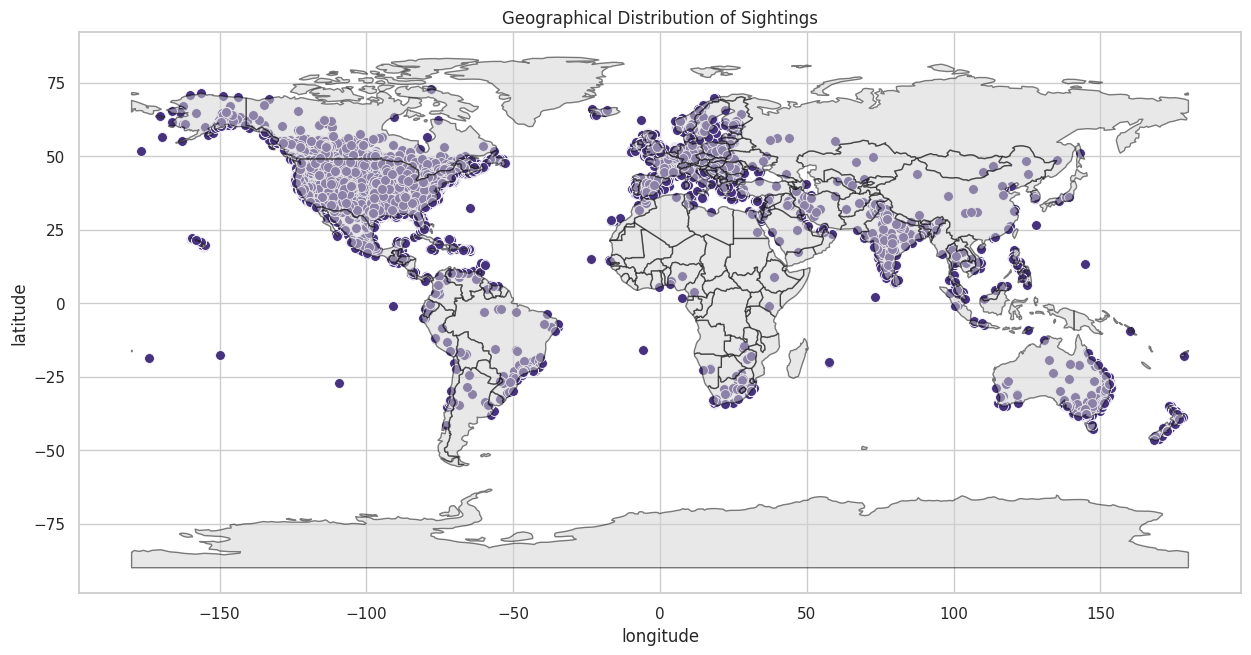

In [8]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame for plotting
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Plot the geographical distribution using Seaborn and GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x='longitude', y='latitude', data=gdf,ax=ax, palette='viridis', s=50)
world.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)
plt.title('Geographical Distribution of Sightings')
plt.show()


#### Seasonal Analysis
##### Explore the distribution of sightings across different seasons.

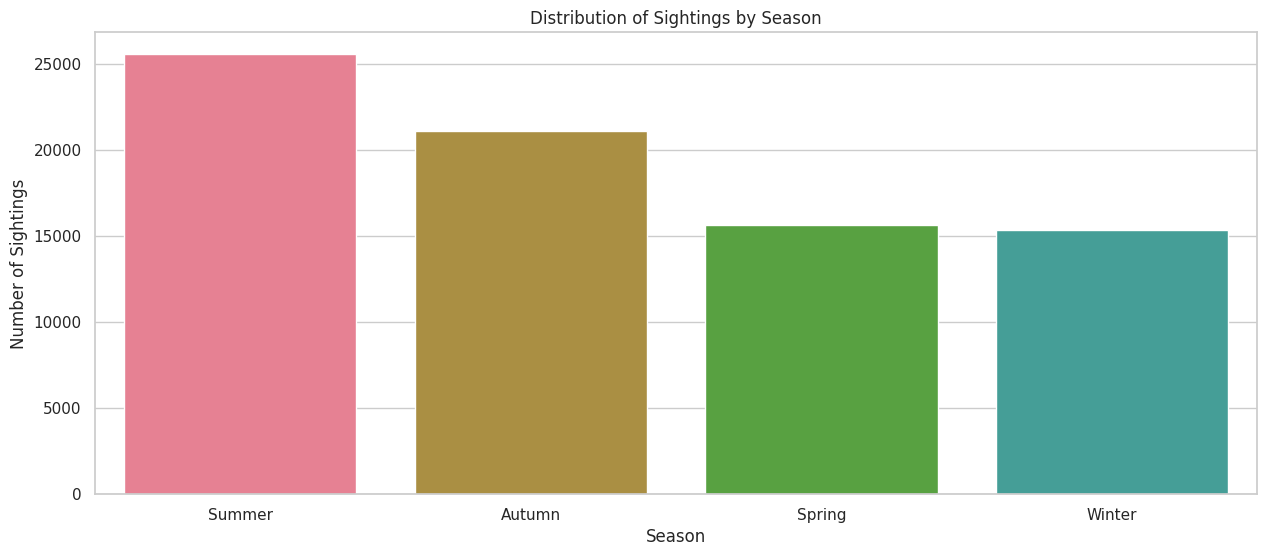

In [9]:
sns.set(style="whitegrid", palette="husl")

# Analyze the distribution of sightings across different seasons
season_counts = data['Season'].value_counts()

# Plot the distribution of sightings by season using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title('Distribution of Sightings by Season')
plt.xlabel('Season')
plt.ylabel('Number of Sightings')
plt.show()


#### Encounter Duration Analysis:
##### Analyze the distribution of encounter durations.

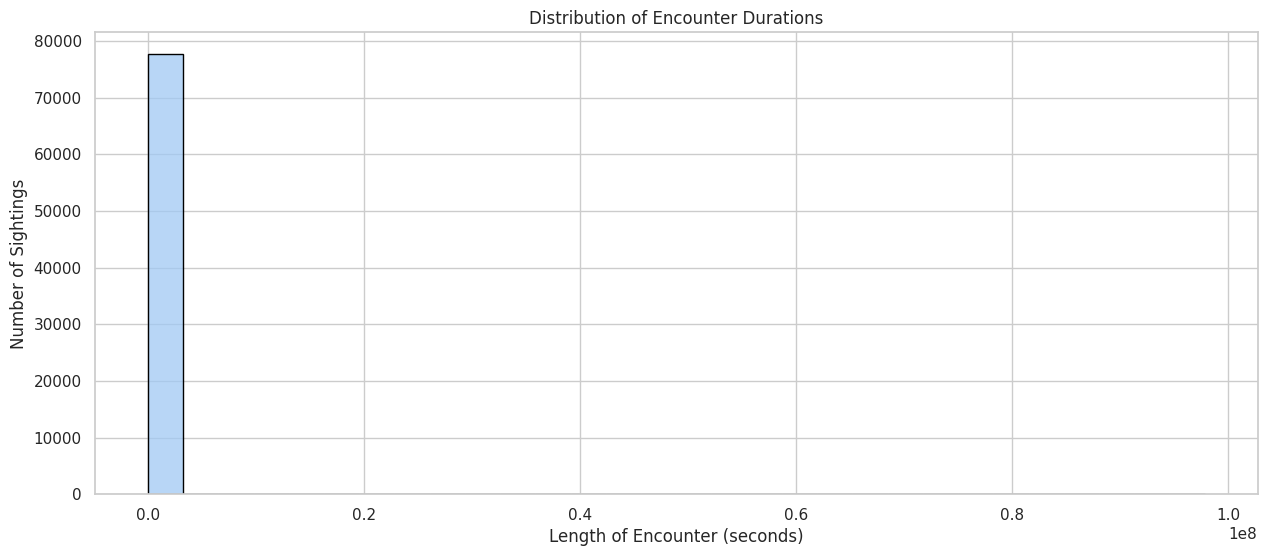

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and color palette
sns.set(style="whitegrid", palette="pastel")

# Analyze the distribution of encounter durations using Seaborn
plt.figure(figsize=(15, 6))
sns.histplot(data['length_of_encounter_seconds'], bins=30, kde=False, edgecolor='black')
plt.title('Distribution of Encounter Durations')
plt.xlabel('Length of Encounter (seconds)')
plt.ylabel('Number of Sightings')
plt.show()


#### Country and Region Analysis:
##### Explore the distribution of sightings across different countries and regions.

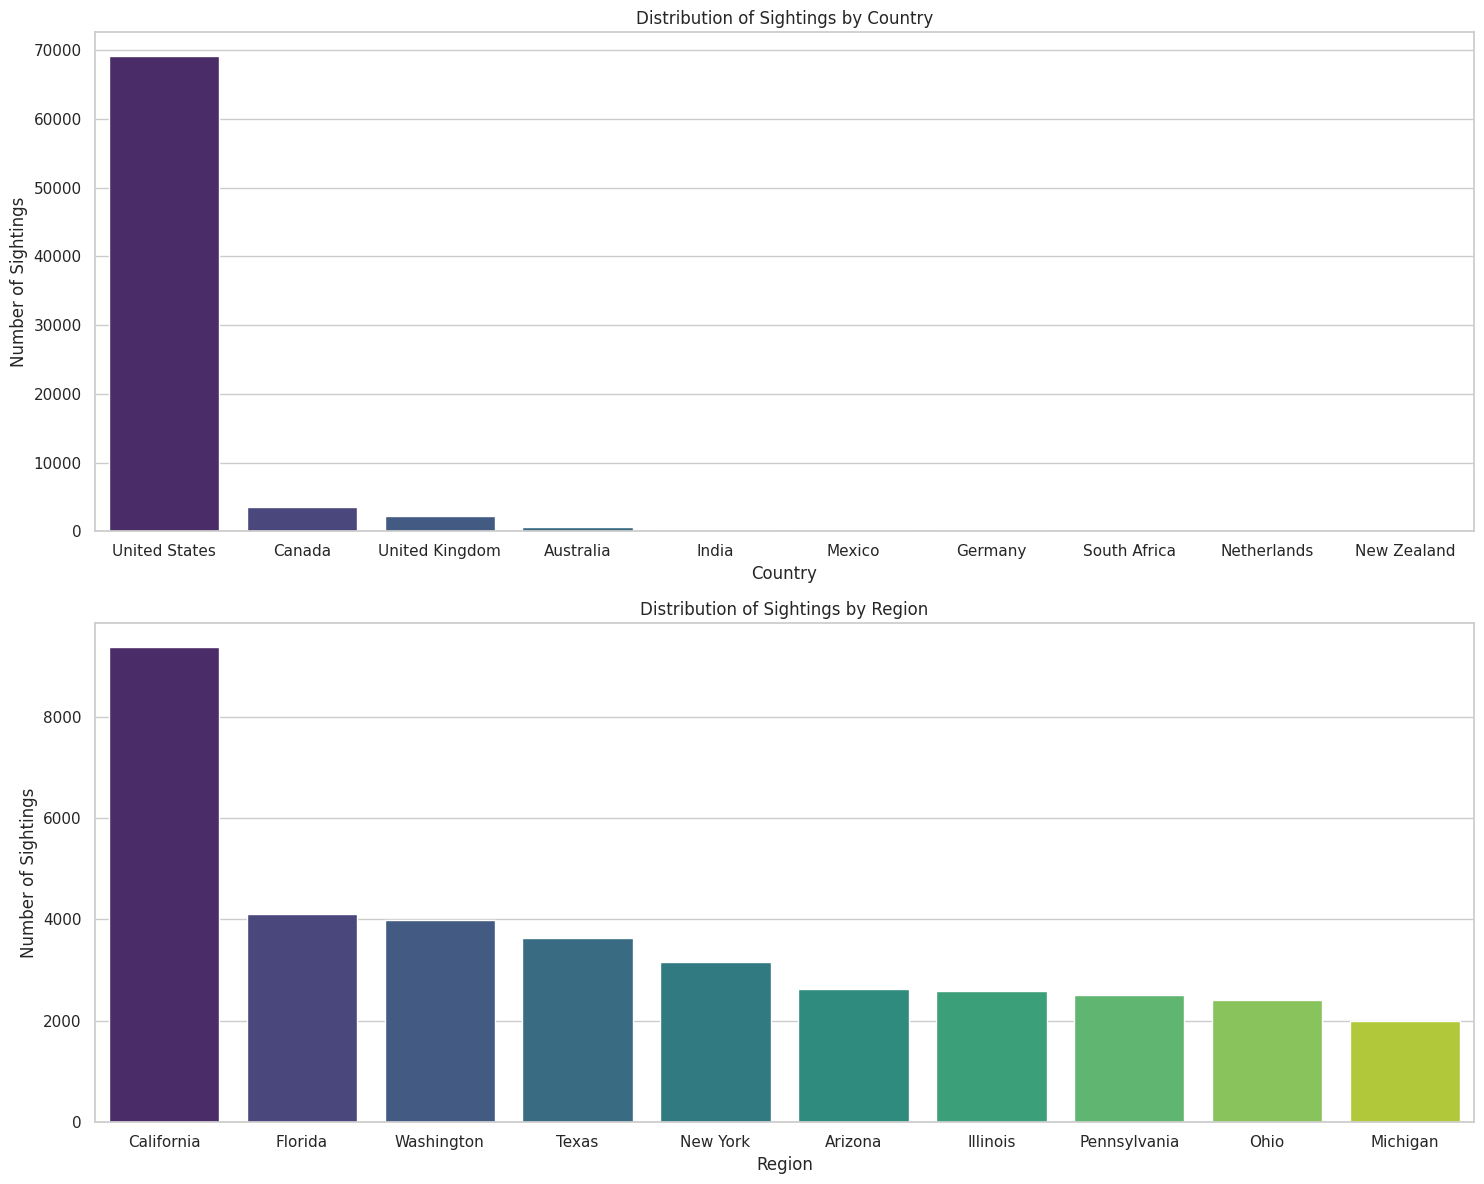

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and color palette
sns.set(style="whitegrid", palette="colorblind")

# Analyze the distribution of sightings across different countries and regions
country_counts = data['Country'].value_counts()[:10]
region_counts = data['Region'].value_counts()[:10]

# Plot the distribution of sightings by country and region using Seaborn
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

sns.barplot(x=country_counts.index, y=country_counts.values, ax=axes[0], palette="viridis")
axes[0].set_title('Distribution of Sightings by Country')
axes[0].set_ylabel('Number of Sightings')

sns.barplot(x=region_counts.index, y=region_counts.values, ax=axes[1], palette="viridis")
axes[1].set_title('Distribution of Sightings by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Number of Sightings')

plt.tight_layout()
plt.show()


In [12]:
import seaborn as sns

#### UFO Shape and Encounter Duration Relationship:
##### Explore whether there's a relationship between the reported UFO shape and encounter duration.

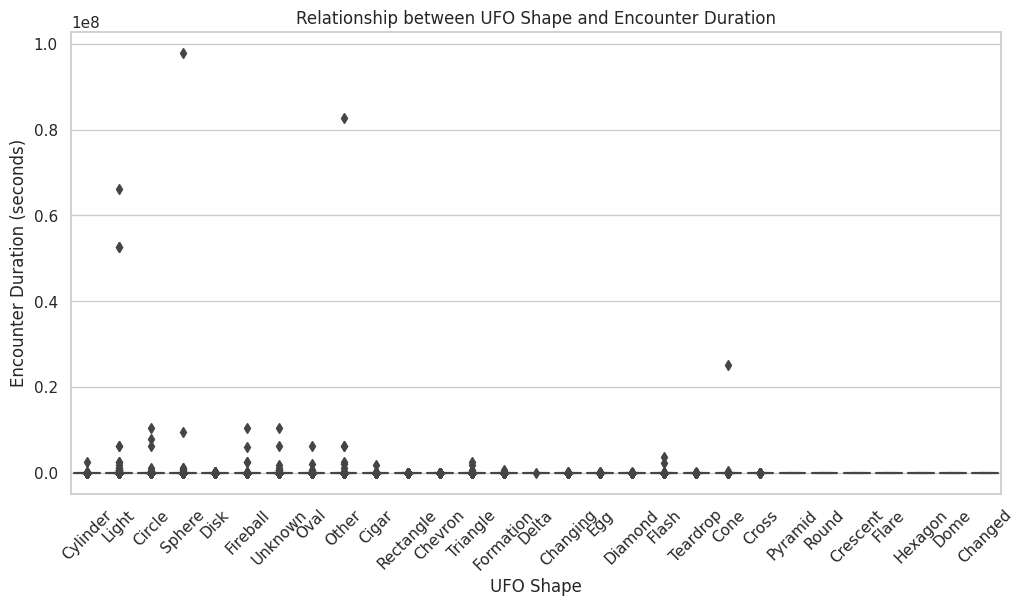

In [13]:
# Analyze the relationship between UFO shape and encounter duration
plt.figure(figsize=(12, 6))
sns.boxplot(x='UFO_shape', y='length_of_encounter_seconds', data=data)
plt.title('Relationship between UFO Shape and Encounter Duration')
plt.xlabel('UFO Shape')
plt.ylabel('Encounter Duration (seconds)')
plt.xticks(rotation=45)
plt.show()


#### Description Word Cloud:
##### Generate a word cloud to visualize the most common words in the descriptions.

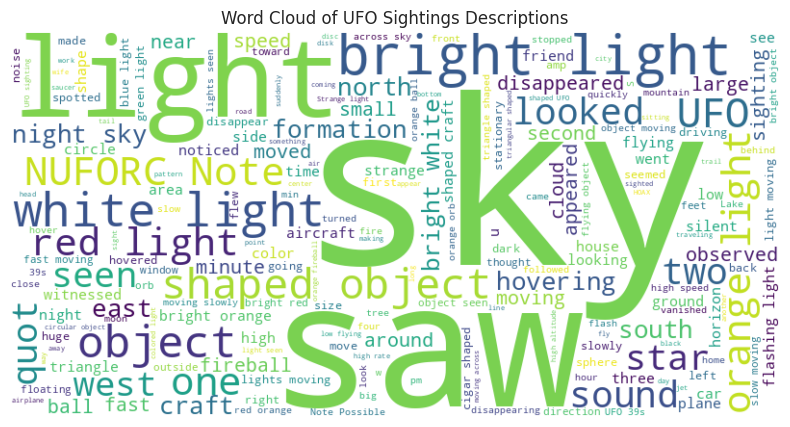

In [14]:
from wordcloud import WordCloud

# Combine all descriptions into a single string
all_descriptions = ' '.join(data['Description'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of UFO Sightings Descriptions')
plt.show()


#### Encounter Duration by Country:
##### Explore the average encounter duration in different countries.

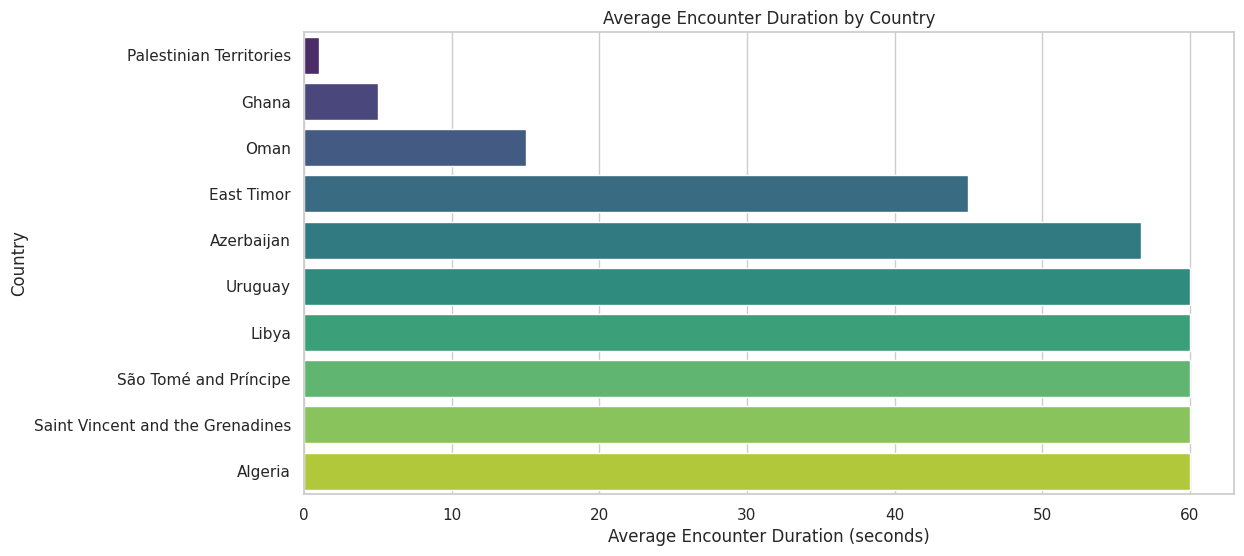

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and color palette
sns.set(style="whitegrid", palette="pastel")

# Analyze the average encounter duration by country
avg_duration_by_country = data.groupby('Country')['length_of_encounter_seconds'].mean().sort_values()[:10]

# Plot the average encounter duration by country using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_duration_by_country.values, y=avg_duration_by_country.index, palette="viridis")
plt.title('Average Encounter Duration by Country')
plt.xlabel('Average Encounter Duration (seconds)')
plt.ylabel('Country')
plt.show()


####    Distribution of UFO Shapes Over Time:
##### Explore how the distribution of UFO shapes has changed over the years.

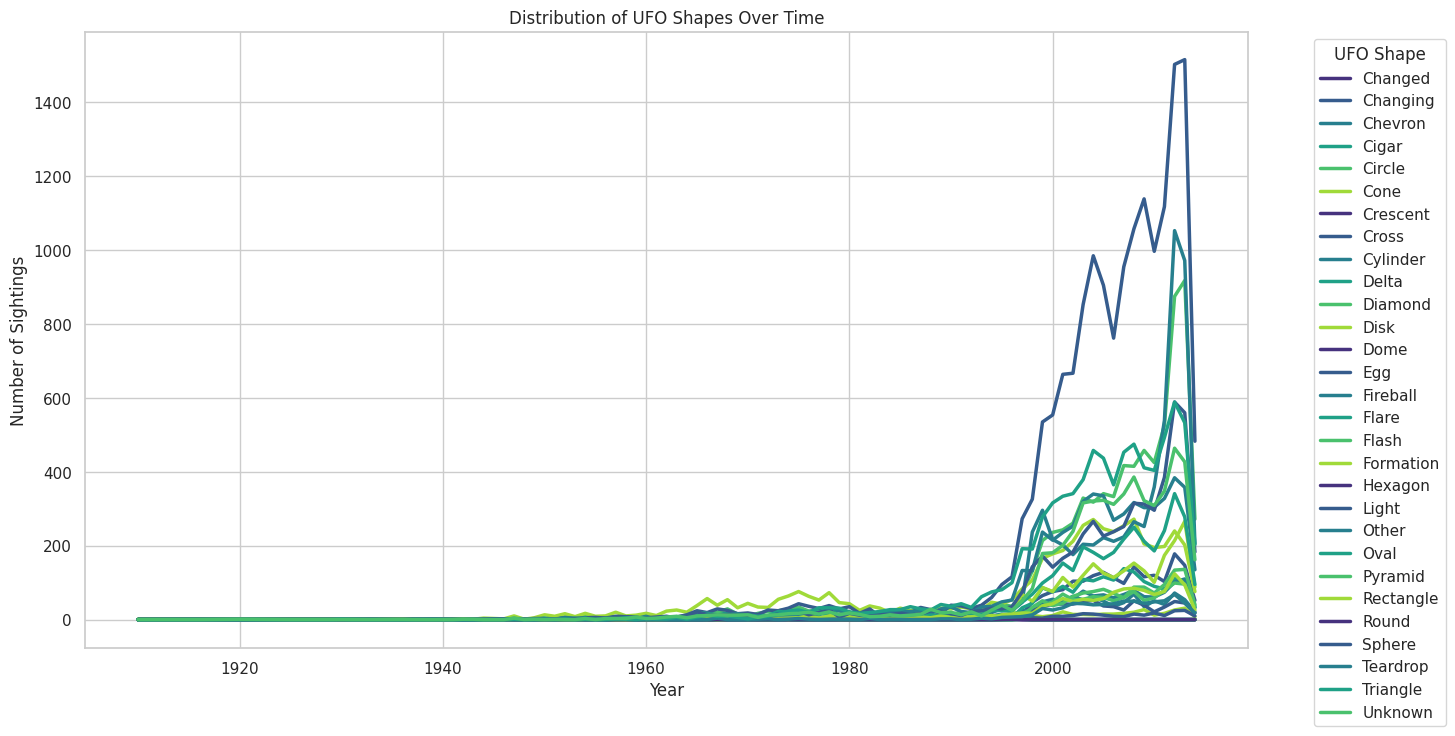

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and color palette
sns.set(style="whitegrid", palette="viridis")

# Create a pivot table for the distribution of UFO shapes over time
shape_over_time = data.pivot_table(index='Year', columns='UFO_shape', aggfunc='size', fill_value=0)

# Plot the distribution of UFO shapes over time using Seaborn with different colors for each shape
plt.figure(figsize=(15, 8))
for shape in shape_over_time.columns:
    sns.lineplot(x=shape_over_time.index, y=shape_over_time[shape], label=shape, linewidth=2.5)

plt.title('Distribution of UFO Shapes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.legend(title='UFO Shape', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Report on UFO Sightings Data Analysis

## Introduction

This report presents a comprehensive analysis of a dataset containing information about UFO sightings. The dataset includes details such as the date and time of the sighting, location, UFO shape, and duration of the encounter.

## Exploratory Data Analysis (EDA)

### Temporal Distribution

#### Yearly Distribution of Sightings
- The bar plot shows a gradual increase in the yearly count of UFO sightings from 1993 to 2011. There are sudden peaks in 2012 and 2014, followed by a significant drop.

#### Monthly Distribution of Sightings
- The bar plot depicts a bell-curve pattern, indicating that peak occurrences happen in July, suggesting a seasonal variation in UFO sightings.

#### Hourly Distribution of Sightings
- The bar plot shows that sightings are most frequent from 5 pm to 11 pm, highlighting the hourly distribution of UFO sightings.

### Geographic Distribution

#### Geographical Distribution
- The scatter plot on the world map reveals that there is a concentration of sightings in coastal areas of countries, indicating potential geographic patterns.

### Season Analysis
#### Distribution of Sightings Across Different Seasons
- The bar plot shows that summer exhibits the highest occurrences of sightings, followed by autumn. Spring and winter have comparatively lower frequencies.

### Country and Region Analysis
#### Distribution of Sightings Across Top 10 Countries and Regions
- The USA has the most UFO sightings, recording nearly 70,000 cases, followed by Canada, with approximately 8,000 cases. Among regions, all the top 10 are from the USA, and California has almost 10,000 cases, ranking first.

### UFO Shapes

#### UFO Shape and Encounter Duration Relationship
- An analysis of UFO shapes reveals that sphere-shaped UFOs have the longest encounter durations, followed by the "Unknown" (others) category.

#### Average Encounter Duration by Country
- The horizontal bar plot shows the average encounter duration for the top 10 countries. Argentina, Saint Vincent and the Grenadines, São Tomé and Príncipe, Libya, and Uruguay have the longest average durations, around 60 seconds. Azerbaijan ranks second, with an average duration of 56 seconds.

## Conclusion

The analysis of the UFO sightings dataset uncovers intriguing temporal, geographic, and shape-related patterns. The report provides a foundation for further research into the factors influencing UFO sightings, opening new avenues for exploration and understanding these phenomena.

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.thesignmaker.co.nz%2Fwp-content%2Fuploads%2F2019%2F04%2FC16_Work-In-Progress.png&f=1&nofb=1&ipt=d83ed9ae52c9b97e77ffa81a433f997beba4b2b7f17fee0992861aec8d5e3318&ipo=images)